In [1]:
# 2023/09/06 0:22 作
# 임교수님의 제안, AI 활용으로 자동 투하

# 그런데 하드 코딩으로 학습 보다는..
# HSV 변환 後, 컬러 (박스 혹은 원형) 검출, Canny 알고리즘 적용?
# 특정 좌표값 이용하여 근사수치일 경우 투하,

## 완성되면 +++
### 시간 변화에 따라 실패 가능성을 높이고
### 실패 가능성이 높으나 타겟 근사치 비행시 투하하도록

# 근데 투하는 어떻게 구현함? ...ㅅㅂ 머해야함? 펌웨어???? ㅗㅗㅗ
# 잘 자 お休みなっっっっっっっっ

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

lower = np.array([0, 200, 0],np.uint8)
upper = np.array([255, 255, 255],np.uint8)

In [5]:
row = 1
col = 4

Canny_threshold1 = 105 #105
Canny_threshold2 = 175 #175 적절함

# 기본 테스트 타겟
example_target_image = cv2.imread('media/target.png')
hsv_scale = cv2.cvtColor(example_target_image,cv2.COLOR_BGR2HSV)
target1 = cv2.inRange(hsv_scale, lower, upper)
canny1 = cv2.Canny(target1,Canny_threshold1,Canny_threshold2)

# 실제 환경과 유사할 수 있는 환경
hard_version_target = cv2.imread('media/hard_target.png')
hard_hsv_scale = cv2.cvtColor(hard_version_target,cv2.COLOR_BGR2HSV)
target2 = cv2.inRange(hard_hsv_scale, lower, upper)
canny2 = cv2.Canny(target2,Canny_threshold1,Canny_threshold2)

# 복잡한 패턴이 포함된 환경
hard_version_target2 = cv2.imread('media/hard_target2.png')
hard_hsv_scale2 = cv2.cvtColor(hard_version_target2,cv2.COLOR_BGR2HSV)
target3 = cv2.inRange(hard_hsv_scale2, lower, upper)
canny3 = cv2.Canny(target3,Canny_threshold1,Canny_threshold2)

threshold = 60

# 노이즈가 포함된 환경
noized_target = cv2.imread('media/noized_target.png')
noized_hsv_scale = cv2.cvtColor(noized_target,cv2.COLOR_BGR2HSV)
noized_filter_target = cv2.inRange(noized_hsv_scale, lower, upper)
canny4 = cv2.Canny(noized_filter_target,Canny_threshold1,Canny_threshold2)

#video 타겟 <일부 커널에서는 문제발생할 수 있음.>
cap = cv2.VideoCapture('media/fail.mp4')

: 

# 현재 코드의 문제점들
# 問１
> HSV 칼라스케일로하면 검은색 개별검출은 포기할 것인가?

# 問２
> 경기장 환경 (먼지/노이즈/카메라특성)에 따른 상자 노이즈가 발생한다면?

# 問３
> 


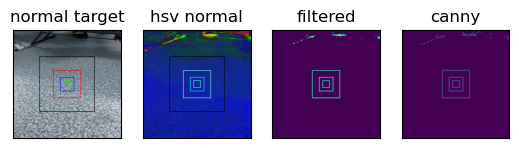

In [8]:
plt.subplot(row, col, 1)
plt.title("normal target")
plt.imshow(example_target_image)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 2)
plt.title("hsv normal")
plt.imshow(hsv_scale)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 3)
plt.title("filtered")
plt.imshow(target1)
plt.xticks([]), plt.yticks([])

plt.subplot(row,col,4)
plt.title("canny")
plt.imshow(canny1)
plt.xticks([]), plt.yticks([])

plt.show()

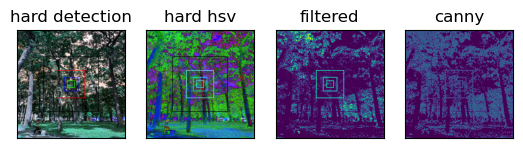

In [9]:
plt.subplot(row, col, 1)
plt.title("hard detection")
plt.imshow(hard_version_target)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 2)
plt.title("hard hsv")
plt.imshow(hard_hsv_scale)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 3)
plt.title("filtered")
plt.imshow(target2)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 4)
plt.title("canny")
plt.imshow(canny2)
plt.xticks([]), plt.yticks([])

plt.show()

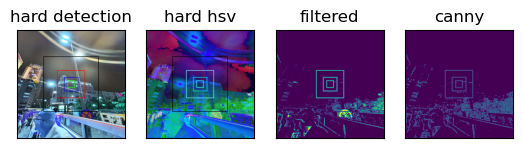

In [10]:
plt.subplot(row, col, 1)
plt.title("hard detection")
plt.imshow(hard_version_target2)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 2)
plt.title("hard hsv")
plt.imshow(hard_hsv_scale2)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 3)
plt.title("filtered")
plt.imshow(target3)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 4)
plt.title("canny")
plt.imshow(canny3)
plt.xticks([]), plt.yticks([])

plt.show()

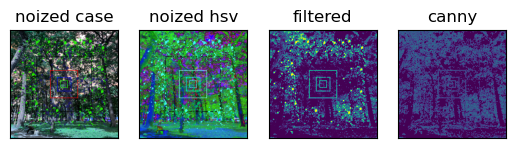

In [11]:
plt.subplot(row, col, 1)
plt.title("noized case")
plt.imshow(noized_target)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 2)
plt.title("noized hsv")
plt.imshow(noized_hsv_scale)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 3)
plt.title("filtered")
plt.imshow(noized_filter_target)
plt.xticks([]), plt.yticks([])

plt.subplot(row, col, 4)
plt.title("canny")
plt.imshow(canny4)
plt.xticks([]), plt.yticks([])

plt.show()

# 위의 알고리즘에서는 윤곽선 검출이 원하는대로 이루어지지 않음.

In [7]:

# 모양 검출해내기
def detectionShape(p):
    period = cv2.arcLength(p,True)
    approx = cv2.approxPolyDP( p, 0.04 * period, True )
    if len(approx) == 4:
        (x,y,w,h) = cv2.boundingRect(approx)
#        print(f"detection shape x:{x} y:{y} w:{w} h:{h}")
        return "square"
    else:
        return "circle"


In [ ]:
# 본 코드 응용하면 사각 박스 (끊어진 선 도출 가능할지도?)
"""
edges = cv2.Canny(skel, 50, 150)
cv2.imshow("edges",edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength=30,maxLineGap=30)
i = 0
for x1,y1,x2,y2 in lines[0]:
    i+=1
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)
print i
"""

### 녹화영상 테스트 해보기

# 실제 카메라 detecting 구현 part
# (일부 커널에서는 문제발생할 수 있음.)

In [12]:
# 클릭 시 기록
colour = (0,255,0)
lineWidth = 3       #-1 will result in filled circle
radius = 30
point = (0,0)

def click(event, x,y, flags, param): # 이미지 클릭 시 좌표출력 <좌표 확인용>
    global point, pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        print("x is",x,"\ny is",y)
        point = (x,y)

In [ ]:
#비디오 캡쳐 실행
rtsp = "rtsp 서버주소..."

cam = cv2.VideoCapture(0) # for test in local
#cam = cv2.VideoCapture(url)

cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 860)
cv2.namedWindow("hsv")
cv2.namedWindow("target")
cv2.setMouseCallback("hsv", click)

# 일반 hsv 색을 이용한 검출

In [ ]:
# 카메라 실행
while cv2.waitKey(1) < 0 :
    ret, frame = cam.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    target = cv2.inRange(hsv,lower,upper)
#    peri = cv2.arcLength(target, True)
#    approx = cv2.approxPolyDP(target, 0.04 * peri, True)

    view = StackVideo(0.8,([frame,hsv,target]))
    cv2.imshow("hsv", view)

cam.release()
cv2.destroyAllWindows()

# Canny Edge 알고리즘 적용

In [ ]:
cv2.namedWindow('params')
cv2.resizeWindow('params',800,500)
cv2.createTrackbar('threshold', 'params', threshold, 255, change_threshold)
cv2.createTrackbar('Canny_threshold1','params',Canny_threshold1,255,change_threshold)
cv2.createTrackbar('Canny_threshold2','params',Canny_threshold2,360,change_threshold)

while cv2.waitKey(1) < 0 :
    threshold = cv2.getTrackbarPos('threshold','params')
    Canny_threshold1 = cv2.getTrackbarPos('Canny_threshold1','params')
    Canny_threshold2 = cv2.getTrackbarPos('Canny_threshold2','params')

    ret, frame = cam.read()
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(frame,Canny_threshold1,Canny_threshold2)
    stacking = StackVideo(0.8,([frame,blurred,canny]))

    cv2.imshow("target", stacking)

cam.release()
cv2.destroyAllWindows()

# 임무장비 발사체계 / 탐지 형태
1. 파란색 -> 빨간색 -> 녹색 -> [ 사각형/원 ] ? 검출

빛의 3원색에 따라 
<p>
파란색  : B 컬러에 대한 가중치 값
</p><p>
빨간색  : R 컬러에 대한 가중치 값
</p><p>
녹 색   : G 컬러에 대한 가중치 값
</p>

## 색 검출
> 좌표, 크기 계산 後 유효한 벡터 범위 내에 빨간 색 도형 검출,
> 위와 같은 방법으로 녹색까지 검출하나 녹색 검출 불가 시 조종자 판단 下 타겟팅

## UX 설계
> 조종자가 조종 중 타겟을 감지하였을 경우 
> 알람음(사운드), 혹은 시각적 표현을 해주는 것은 어떠한가?

# 수익이형에게 알려줄 現 알고리즘 설계계획

# 1차 : 타겟지점의 정의
 > 3원색 감지 + black K->B->R->G 순서로 사각박스를 인식
 <p><code>
 1 - 1. 단일 검은색 사각박스 감지
</code></p><p><code>
 1 - 2. 동일한 위치에서 단일 파란색 사각박스 감지
 </code></p><p><code>
 1 - 3. 동일한 위치에서 단일 빨간색 사각박스 감지
 </code></p><p><code>
 1 - 4. 동일한 위치에서 단일 녹색 사각박스 감지
 
 </code></p>
 > 위의 과정 모두 만족하는 경우, 해당하는 위치가 타겟임을 정의하고 좌표출력.

 # 위 코드의 예상되는 문제점.
 1. 여러 예기치못한 변수로 인하여 타겟 정의에 실패할경우?
 - 확률변수 가중치 개념을 활용하여 {타겟일 확률?}을 정의 및 확률에 따라 표현방식을 다르게 할 것

